In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import chainer
from dataset import SquaresDataset
import matplotlib.pyplot as plt
import numpy as np
from functions import *
from tests import *
from chainer import cuda 
import cupy
from chainer.optimizers import MomentumSGD

In [3]:
db = SquaresDataset()
# Network initialization
from network import VGGNet
net = VGGNet()
net.to_gpu(0)

# Optimizer
optimizer =MomentumSGD(lr= 0.01)
optimizer.setup(net)

# Move network to gpu

  0%|          | 0/500 [00:00<?, ?it/s]

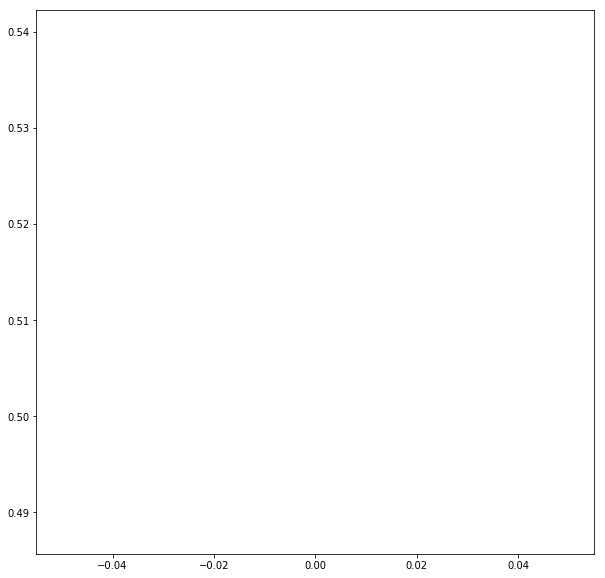

  2%|▏         | 10/500 [00:03<02:41,  3.04it/s]

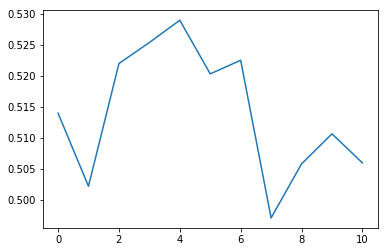

  4%|▍         | 20/500 [00:06<02:23,  3.35it/s]

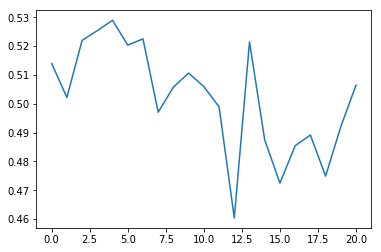

  6%|▌         | 30/500 [00:09<02:19,  3.37it/s]

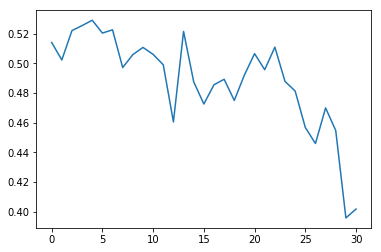

  8%|▊         | 40/500 [00:12<02:17,  3.35it/s]

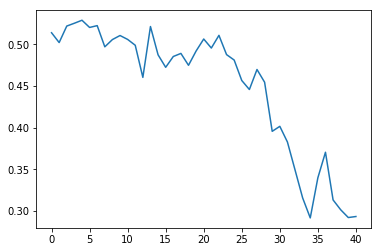

 10%|█         | 50/500 [00:16<02:14,  3.35it/s]

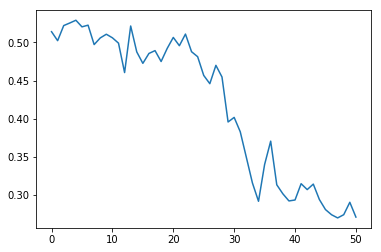

 12%|█▏        | 60/500 [00:19<02:11,  3.36it/s]

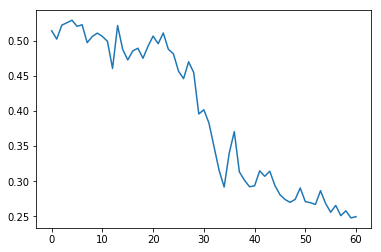

 14%|█▍        | 70/500 [00:22<02:08,  3.35it/s]

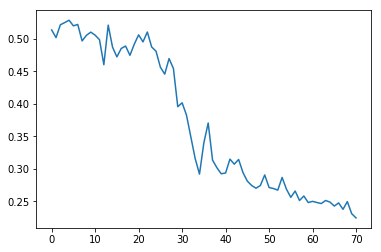

 16%|█▌        | 80/500 [00:25<02:04,  3.36it/s]

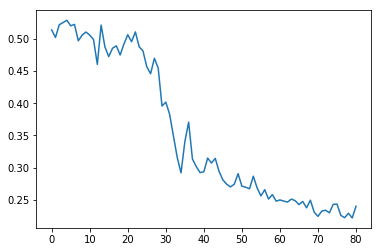

 18%|█▊        | 90/500 [00:28<02:02,  3.35it/s]

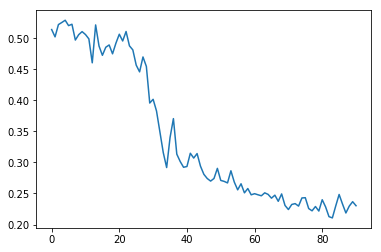

 20%|██        | 100/500 [00:31<01:59,  3.35it/s]

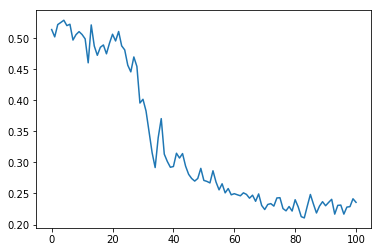

 22%|██▏       | 110/500 [00:34<01:56,  3.34it/s]

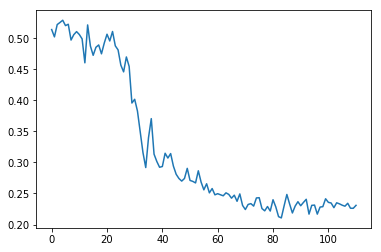

 24%|██▍       | 120/500 [00:37<01:53,  3.35it/s]

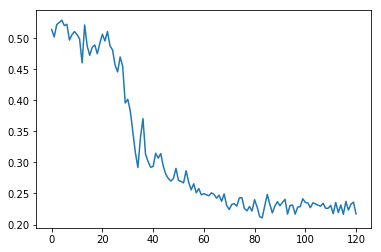

 26%|██▌       | 130/500 [00:40<01:50,  3.35it/s]

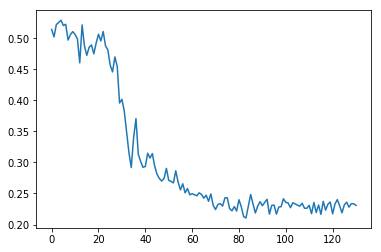

 28%|██▊       | 140/500 [00:43<01:47,  3.35it/s]

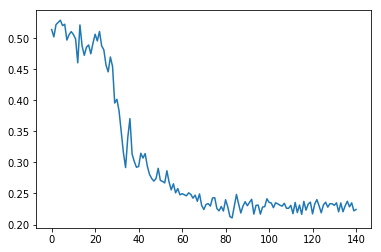

 30%|███       | 150/500 [00:46<01:44,  3.35it/s]

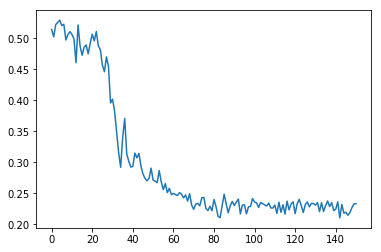

 32%|███▏      | 160/500 [00:49<01:41,  3.35it/s]

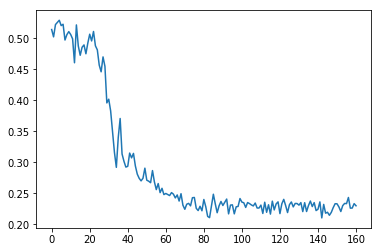

 34%|███▍      | 170/500 [00:52<01:38,  3.35it/s]

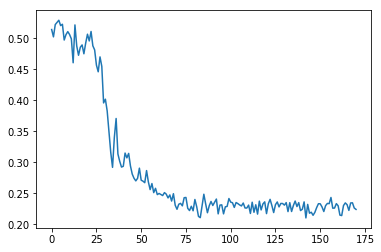

 36%|███▌      | 180/500 [00:56<01:35,  3.35it/s]

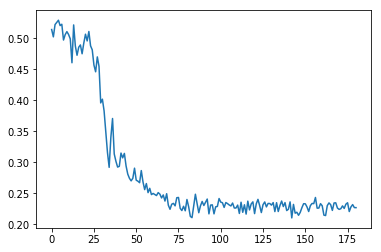

 38%|███▊      | 190/500 [00:59<01:32,  3.36it/s]

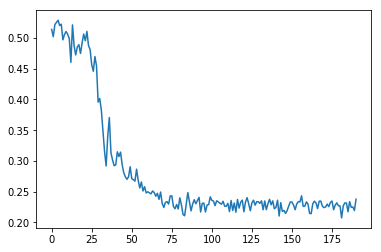

 40%|████      | 200/500 [01:02<01:29,  3.35it/s]

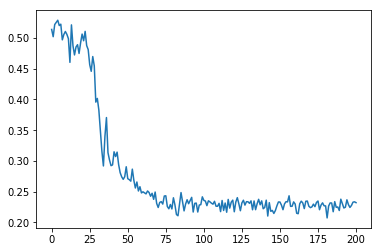

 42%|████▏     | 210/500 [01:05<01:26,  3.35it/s]

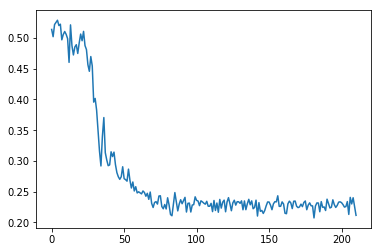

 44%|████▍     | 220/500 [01:08<01:23,  3.34it/s]

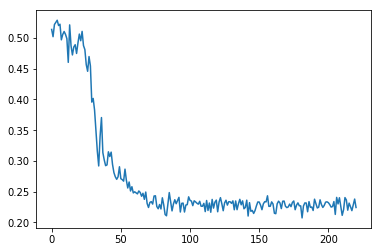

 46%|████▌     | 230/500 [01:11<01:20,  3.35it/s]

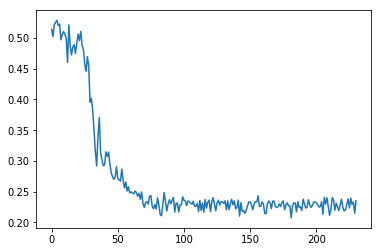

 46%|████▌     | 231/500 [01:11<01:27,  3.06it/s]

KeyboardInterrupt: 

In [4]:
from tqdm import tqdm
losses = []

plt.figure(figsize=(10,10))


# Training for loop
for i in tqdm(range(500)):
    imgs, labels = db.generate_batch(n=10, h=50, w=50, img_h=240, img_w=240)
    imgs_down, labels_down = downsample(imgs, labels)
    
    net.to_gpu(0)

    imgs_gpu = chainer.Variable(cuda.to_gpu(imgs)) #gpu
    
    gt_class, gt_loc = encode_y(imgs_down, labels_down) #cpu
    
    gt_class.to_gpu(0)
    gt_loc.to_gpu(0)

    # Forward pass: SLOW!!!
    pred_class, pred_loc = net(imgs_gpu) #net(imgs) #gpu
    
   # Loss calculation
    #class_loss = classification_loss(pred_class, gt_class)
    class_loss = regression_loss(pred_loc, gt_loc, gt_class)
    #net_loss = loss(pred_class, pred_loc, gt_class, gt_loc, lambd=0.0).reshape((1))
    #print(net_loss.debug_print())
    #net_loss.to_gpu(0)
    
    # Update network
    net.zerograds()
    class_loss.backward()
    optimizer.update()
    
    # Print loss
    #show_image(pred_class.data[0,0,:,:], 'prediction output vgg')
    #
    #show_image(gt_class.data[0,0,:,:], 'class output vgg')
    losses.append(class_loss.data.get())
    
    #print(net_loss.data)
    if i % 10 == 0:
        plt.plot(range(len(losses)), losses)
        plt.show()
    
# Final loss plot


In [ ]:
print(losses[-1])

In [6]:
!git commit -am "finally both classification loss and regression loss converging. Mean vs sum was the culprit"


[pawan_files c4f9645] finally both classification loss and regression loss converging. Mean vs sum was the culprit
 7 files changed, 720 insertions(+), 850 deletions(-)
 rewrite Finale.ipynb (89%)


In [9]:
%env http_proxy http://proxy.ncbs.res.in:3128
%env https_proxy http://proxy.ncbs.res.in:3128

env: http_proxy=http://proxy.ncbs.res.in:3128
env: https_proxy=http://proxy.ncbs.res.in:3128


In [10]:
!git push

Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 9, done.
Delta compression using up to 20 threads.
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 278.44 KiB | 0 bytes/s, done.
Total 9 (delta 7), reused 0

In [ ]:
!git 

## IDLE inline implementation of gpu. No functions right now. Everything done inline.